<a href="https://colab.research.google.com/github/k9pranav/ML_learning_and_exp/blob/main/Dubai_property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will be working with a Dataset that has data regarding property prices and property attributes of Dubai. 

I found the data set on Kaggle. Here is the link: https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset

Like states in READ.ME, this notebook acts as a playground for me to deploy ML techniques and algos that I am learning. 

The reason I am putting it on Github is track and showcase my progress.

In [1]:
# Uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving properties_data.csv to properties_data.csv


In [2]:
import pandas as pd 
import io

df = pd.read_csv(io.BytesIO(uploaded['properties_data.csv']))
df

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,...,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,...,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,...,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,...,False,True,True,True,False,False,False,False,True,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

<function matplotlib.pyplot.show>

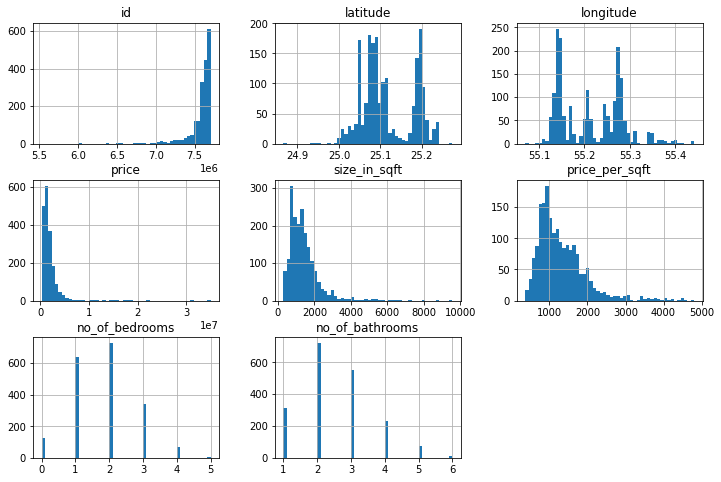

In [4]:
import matplotlib.pyplot as plt

df.hist(bins = 50, figsize = (12,8))
plt.show

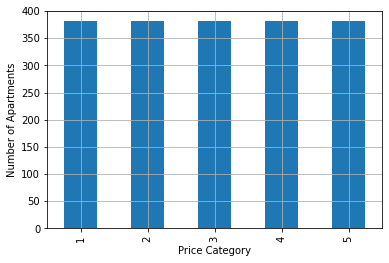

In [13]:
import numpy as np
df['size_cut'] = pd.qcut(df['size_in_sqft'], q = [0., 0.2, 0.4, 0.6, 0.8, 1.], labels = [1,2,3,4,5])

df['size_cut'].value_counts().sort_index().plot.bar(grid = True)
plt.xlabel('Price Category')
plt.ylabel('Number of Apartments')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(df, test_size = 0.2, stratify = df['size_cut'])

In [15]:
for i in (strat_train_set, strat_test_set):
  i.drop('size_cut', axis = 1, inplace=True)

In [16]:
dubai = strat_train_set.copy()

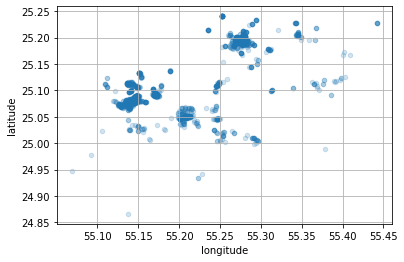

In [24]:
dubai.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show()

In [25]:
corr_matrix = dubai.corr()
corr_matrix['price'].sort_values()

pets_allowed          -0.119068
lobby_in_building     -0.102611
childrens_play_area   -0.099696
security              -0.095943
childrens_pool        -0.095313
networked             -0.094763
shared_pool           -0.088251
vastu_compliant       -0.085965
barbecue_area         -0.077193
shared_gym            -0.069993
study                 -0.032030
id                    -0.030068
shared_spa            -0.025292
longitude             -0.025041
walk_in_closet        -0.020220
kitchen_appliances    -0.014809
view_of_landmark      -0.011166
maid_service          -0.000807
central_ac             0.004304
covered_parking        0.005282
private_garden         0.012554
balcony                0.020757
built_in_wardrobes     0.033927
unfurnished            0.048971
private_jacuzzi        0.049496
private_gym            0.070580
view_of_water          0.081645
maid_room              0.109306
concierge              0.117811
latitude               0.204052
private_pool           0.321286
no_of_ba

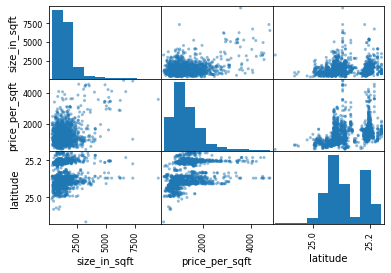

In [34]:
from pandas.plotting import scatter_matrix

attributes = ['private_pool', 'no_of_bathrooms', 'no_of_bedrooms', 'size_in_sqft']

scatter_matrix(dubai[['size_in_sqft', 'price_per_sqft', 'latitude']])
plt.show()

In [36]:
dubai['quality'].value_counts()

Medium    905
Low       450
High      103
Ultra      66
Name: quality, dtype: int64